# **Import Libraries and modules**

**Download and install Keras**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

**Import mnist dataset, layers, utilities and data augmentation tools**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Print Dimensions of the train dataset. And print first image from train dataset**

(60000, 28, 28)


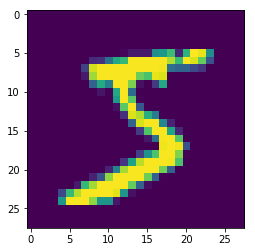

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

**Reshape data into (28,28,1) array**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

**Normalize Data**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Print Sample Data**

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

**Data Preprocessing - Define Data Augmentation Stratagy using ImageDataGenerator Class**

In [0]:
IDG = ImageDataGenerator(
            zoom_range = 0.04, 
            horizontal_flip=False,
            vertical_flip=False,
            width_shift_range=0.04,
            height_shift_range=0.08,
            rotation_range=20)

**Fits the data generator to some sample data.**

In [0]:
IDG.fit(X_train)

**Define a new architecture by using a sequential model.**

In [0]:
from keras.layers import Activation ## Import Activation Functions
model = Sequential()
## Convolution Block 1 Begins
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) ## input 28X28X1 as image dimention. Define 16 channels of kernel size 3X3X1. Receptive field size is 3X3. Output size is 26X26X16. use ReLU activation function.
model.add(Convolution2D(16, 3, 3, activation='relu')) ## input size 26X26X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 5X5. Output size is 24X24X16. use ReLU activation function. 
model.add(Convolution2D(16, 3, 3, activation='relu')) ## input size 24X24X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 7X7. Output size is 22X22X16. use ReLU activation function. 
model.add(Convolution2D(16, 3, 3, activation='relu')) ## input size 22X22X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 9X9. Output size is 20X20X16. use ReLU activation function. 
## Convolution Block 1 Ends
## Transition Block 1 Begins
model.add(Convolution2D(16, 1, activation='relu')) ## input size 20X20X16 . Define 16 channels of kernel size 1X1X16. Receptive field size is 11X11. Output size is 20X20X16. use ReLU activation function. 
model.add(MaxPooling2D(pool_size=(2, 2))) ## Use maxpooling layer
## Transition Block 1 Ends
## Convolution Block 2 Begins
model.add(Convolution2D(16,3,3, activation='relu')) ## input size 10X10X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 22X22. Output size is 8X8X16. use ReLU activation function. 
model.add(Convolution2D(16,3,3, activation='relu')) ## input size 8X8X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 24X24. Output size is 6X6X16. use ReLU activation function. 
model.add(Convolution2D(16,3,3, activation='relu')) ## input size 6X6X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 26X26. Output size is 4X4X16. use ReLU activation function. 
model.add(Convolution2D(16,3,3, activation='relu')) ## input size 4X4X16 . Define 16 channels of kernel size 3X3X16. Receptive field size is 28X28. Output size is 2X2X16. use ReLU activation function. 
## Convolution Block 2 Ends
model.add(Convolution2D(10, 2))
model.add(Flatten()) ## reshape 
model.add(Activation('softmax')) ## Use softmax activation for classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__'

In [0]:
model.summary() ## create summary to see number of parameters are less than 20000

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 20, 20, 16)        2320      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 20, 20, 16)        272       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 16)          2320      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])  ## Compile the model 

**Train the model training and validation sets**

In [0]:
model.fit_generator(IDG.flow(X_train, Y_train, batch_size=256),steps_per_epoch=len(X_train) / 32, epochs=20,verbose=1)

Epoch 1/20
1875/1875 [==============================] - 102s 54ms/step - loss: 0.2633 - acc: 0.9167
Epoch 2/20
1875/1875 [==============================] - 100s 53ms/step - loss: 0.0947 - acc: 0.9712
Epoch 3/20
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0666 - acc: 0.9798
Epoch 4/20
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0533 - acc: 0.9837
Epoch 5/20
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0457 - acc: 0.9860
Epoch 6/20
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0409 - acc: 0.9874
Epoch 7/20
1875/1875 [==============================] - 102s 54ms/step - loss: 0.0363 - acc: 0.9888
Epoch 8/20
1875/1875 [==============================] - 100s 54ms/step - loss: 0.0342 - acc: 0.9894
Epoch 9/20
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0321 - acc: 0.9902
Epoch 10/20
1875/1875 [==============================] - 102s 55ms/step - loss: 0.0294 - acc: 0.9909

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) ## Evaluate the model

In [0]:
print(score) ## print the validation accuracy

[0.018241705781871134, 0.9947]


In [0]:
y_pred = model.predict(X_test) ## use model to do prediction

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.7214710e-12 2.4099273e-07 3.0612355e-08 6.0059642e-09 1.6207794e-07
  2.5173616e-10 2.5627299e-15 9.9999869e-01 1.4437826e-07 7.9645895e-07]
 [5.4463478e-09 4.4856591e-10 9.9999976e-01 8.6979035e-11 2.1392964e-07
  4.8822071e-12 8.3678762e-09 9.7787743e-11 8.4364943e-10 3.3055323e-09]
 [6.6479398e-11 9.9999499e-01 2.3426830e-06 2.6378190e-11 2.9542542e-07
  3.2682479e-08 2.1939888e-08 2.3260757e-06 4.5142359e-10 6.0644587e-11]
 [9.9995458e-01 1.2543867e-15 2.8591431e-08 5.9382792e-09 4.8232091e-10
  7.3548989e-09 6.3627044e-06 1.0545578e-12 3.9256947e-06 3.5136432e-05]
 [1.8795657e-13 2.7409836e-08 6.2282478e-11 2.1732584e-14 9.9932420e-01
  4.5267654e-10 6.4180384e-08 6.6771770e-09 6.5351113e-10 6.7567825e-04]
 [1.0782871e-12 9.9999952e-01 2.1622274e-07 3.8227993e-13 5.2540394e-09
  1.8490013e-09 2.6807434e-09 2.5273721e-07 1.3912647e-11 2.2876677e-12]
 [1.3030883e-14 1.1801427e-06 7.4504720e-13 1.3080951e-08 9.9534398e-01
  1.5286614e-05 4.3711566e-11 1.4059612e-08 6.6284275e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

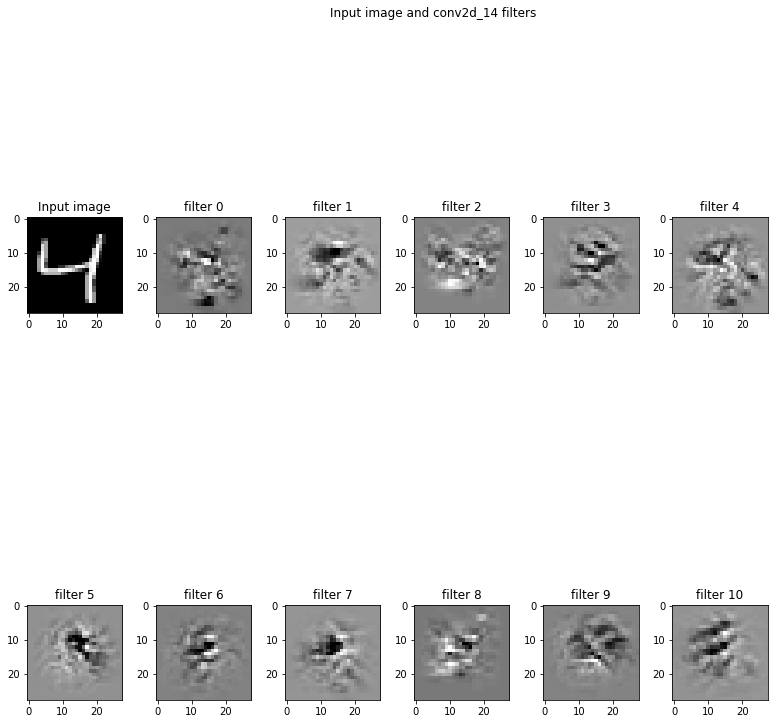

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()